## <p style='text-align:center'><b>`Lab06: Gradient Descent for Logistic Regression`</b></p>
### <b><font color = green|>I.) Goals</font></b>
In this lab, you will:
- update gradient descent for logistic regression.
- explore gradient descent on a familiar data set

In [1]:
import copy, math
import numpy as np
#%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

### <font color = green|><b>II.) Data set</b></font> 
Let's start with the same two feature data set used in the decision boundary lab.

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

As before, we'll use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles.

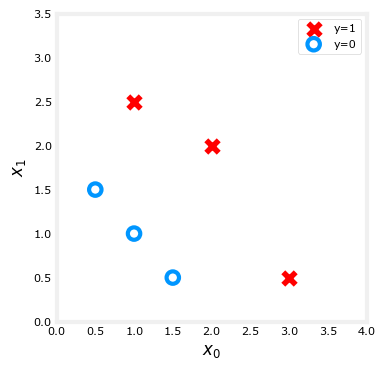

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

### <b><font color = green|>III.) Logistic Gradient Descent</font></b>
<img src="./images/C1_W3_Logistic_gradient_descent.png" style=" width:700px; padding: 10px; " >

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


### <font color = green|><b>IV.) Gradient Descent Implementation</b></font>
The gradient descent algorithm implementation has two components: 
- The loop implementing equation (1) above. This is `gradient_descent` below and is generally provided to you in optional and practice labs.
- The calculation of the current gradient, equations (2,3) above. This is `compute_gradient_logistic` below. You will be asked to implement this week's practice lab.

##### Calculating the Gradient, Code Description
Implements equation (2),(3) above for all $w_j$ and $b$.
There are many ways to implement this. Outlined below is this:
- initialize variables to accumulate `dj_dw` and `dj_db`
- for each example
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in this example,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- divide `dj_db` and `dj_dw` by total number of examples (m)
- note that $\mathbf{x}^{(i)}$ in numpy `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`

In [6]:
def compute_gradient_logistic(X, y, w, b): 
    """
  Computes the gradient for linear regression 
 
  Args:
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters  
    b (scalar)      : model parameter
  Returns
    dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
    dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
  """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

Check the implementation of the gradient function using the cell below.

In [5]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

### <font color = green|><b>V.) Gradient Descent Code</b></font> 
The code implementing equation (1) above is implemented below. Take a moment to locate and compare the functions in the routine to the equations above.

In [34]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


Let's run gradient descent on our data set.

In [36]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28 5.08], b:-14.222409982019837


### <b><font color = green|>VI.) Plot the results of gradient descent:

In [31]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [32]:
def plt_prob(ax, w_out,b_out):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)

    # get probability for x0,x1 ranges
    tmp_x0,tmp_x1 = np.meshgrid(x0_space,x1_space)
    z = np.zeros_like(tmp_x0)
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            z[i,j] = sigmoid(np.dot(w_out, np.array([tmp_x0[i,j],tmp_x1[i,j]])) + b_out)


    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

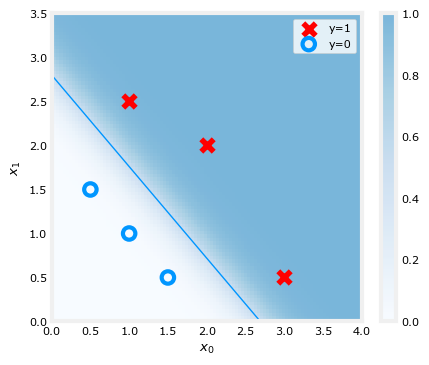

In [33]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

In the plot above:
 - the shading reflects the probability y=1 (result prior to decision boundary)
 - the decision boundary is the line at which the probability = 0.5
 

### <font color = green|><b>VII.) Another Data set</b></font>
Let's return to a one-variable data set. With just two parameters, $w$, $b$, it is possible to plot the cost function using a contour plot to get a better idea of what gradient descent is up to.

In [10]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

As before, we'll use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles.

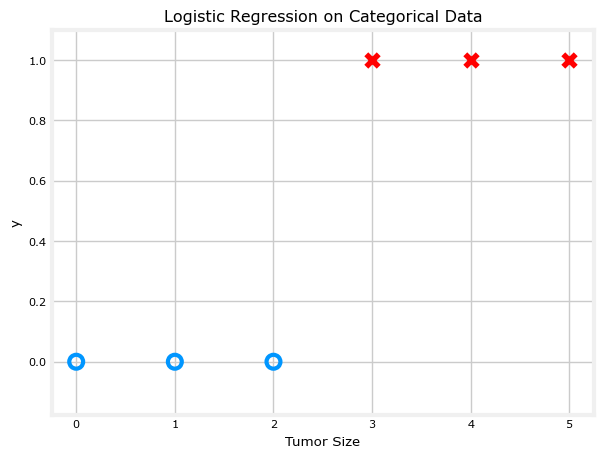

In [28]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
plt_tumor_data(x_train, y_train, ax)
plt.grid()
plt.show()

In the plot below, try:
- changing $w$ and $b$ by clicking within the contour plot on the upper right.
    - changes may take a second or two
    - note the changing value of cost on the upper left plot.
    - note the cost is accumulated by a loss on each example (vertical dotted lines)
- run gradient descent by clicking the orange button.
    - note the steadily decreasing cost (contour and cost plot are in log(cost) 
    - clicking in the contour plot will reset the model for a new run
- to reset the plot, rerun the cell

In [45]:
class data_plot:
    ''' handles data plot '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, ax, x_train, y_train, w, b):
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train
        self.m = x_train.shape[0]
        self.w = w
        self.b = b

        self.plt_tumor_data()
        self.draw_logistic_lines(firsttime=True)
        self.mk_cost_lines(firsttime=True)

        self.ax.autoscale(enable=False) # leave plot scales the same after initial setup

    def plt_tumor_data(self):
        x = self.x_train
        y = self.y_train
        pos = y == 1
        neg = y == 0
        self.ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
        self.ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none',
                   edgecolors=dlc["dlblue"],lw=3)
        self.ax.set_ylim(-0.175,1.1)
        self.ax.set_ylabel('y')
        self.ax.set_xlabel('Tumor Size')
        self.ax.set_title("Logistic Regression on Categorical Data")

    def update(self, w, b):
        self.w = w
        self.b = b
        self.draw_logistic_lines()
        self.mk_cost_lines()

    def draw_logistic_lines(self, firsttime=False):
        if not firsttime:
            self.aline[0].remove()
            self.bline[0].remove()
            self.alegend.remove()

        xlim  = self.ax.get_xlim()
        x_hat = np.linspace(*xlim, 30)
        y_hat = sigmoid(np.dot(x_hat.reshape(-1,1), self.w) + self.b)
        self.aline = self.ax.plot(x_hat, y_hat, color=dlc["dlblue"],
                                     label="y = sigmoid(z)")
        f_wb = np.dot(x_hat.reshape(-1,1), self.w) + self.b
        self.bline = self.ax.plot(x_hat, f_wb, color=dlc["dlorange"], lw=1,
                                     label=f"z = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
        self.alegend = self.ax.legend(loc='upper left')

    def mk_cost_lines(self, firsttime=False):
        ''' makes vertical cost lines'''
        if not firsttime:
            for artist in self.cost_items:
                artist.remove()
        self.cost_items = []
        cstr = f"cost = (1/{self.m})*("
        ctot = 0
        label = 'cost for point'
        addedbreak = False
        for p in zip(self.x_train,self.y_train):
            f_wb_p = sigmoid(self.w*p[0]+self.b)
            c_p = compute_cost_matrix(p[0].reshape(-1,1), p[1],np.array(self.w), self.b, logistic=True, lambda_=0, safe=True)
            c_p_txt = c_p
            a = self.ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlc["dlpurple"], ls='dotted', label=label)
            label='' #just one
            cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
            b = self.ax.annotate(f'{c_p_txt:0.1f}', xy=cxy, xycoords='data',color=dlc["dlpurple"],
                        xytext=(5, 0), textcoords='offset points')
            cstr += f"{c_p_txt:0.1f} +"
            if len(cstr) > 38 and addedbreak is False:
                cstr += "\n"
                addedbreak = True
            ctot += c_p
            self.cost_items.extend((a,b))
        ctot = ctot/(len(self.x_train))
        cstr = cstr[:-1] + f") = {ctot:0.2f}"
        ## todo.. figure out how to get this textbox to extend to the width of the subplot
        c = self.ax.text(0.05,0.02,cstr, transform=self.ax.transAxes, color=dlc["dlpurple"])
        self.cost_items.append(c)

In [46]:
class contour_and_surface_plot:
    ''' plots combined in class as they have similar operations '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, axc, axs, x_train, y_train, w_range, b_range, w, b):

        self.x_train = x_train
        self.y_train = y_train
        self.axc = axc
        self.axs = axs

        #setup useful ranges and common linspaces
        b_space  = np.linspace(*b_range, 100)
        w_space  = np.linspace(*w_range, 100)

        # get cost for w,b ranges for contour and 3D
        tmp_b,tmp_w = np.meshgrid(b_space,w_space)
        z = np.zeros_like(tmp_b)
        for i in range(tmp_w.shape[0]):
            for j in range(tmp_w.shape[1]):
                z[i,j] = compute_cost_matrix(x_train.reshape(-1,1), y_train, tmp_w[i,j], tmp_b[i,j],
                                             logistic=True, lambda_=0, safe=True)
                if z[i,j] == 0:
                    z[i,j] = 1e-9

        ### plot contour ###
        CS = axc.contour(tmp_w, tmp_b, np.log(z),levels=12, linewidths=2, alpha=0.7,colors=dlcolors)
        axc.set_title('log(Cost(w,b))')
        axc.set_xlabel('w', fontsize=10)
        axc.set_ylabel('b', fontsize=10)
        axc.set_xlim(w_range)
        axc.set_ylim(b_range)
        self.update_contour_wb_lines(w, b, firsttime=True)
        axc.text(0.7,0.05,"Click to choose w,b",  bbox=dict(facecolor='white', ec = 'black'), fontsize = 10,
                transform=axc.transAxes, verticalalignment = 'center', horizontalalignment= 'center')

        #Surface plot of the cost function J(w,b)
        axs.plot_surface(tmp_w, tmp_b, z,  cmap = cm.jet, alpha=0.3, antialiased=True)
        axs.plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
        axs.set_xlabel("$w$")
        axs.set_ylabel("$b$")
        axs.zaxis.set_rotate_label(False)
        axs.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.set_zlabel("J(w, b)", rotation=90)
        axs.view_init(30, -120)

        axs.autoscale(enable=False)
        axc.autoscale(enable=False)

        self.path = path(self.w,self.b, self.axc)  # initialize an empty path, avoids existance check

    def update_contour_wb_lines(self, w, b, firsttime=False):
        self.w = w
        self.b = b
        cst = compute_cost_matrix(self.x_train.reshape(-1,1), self.y_train, np.array(self.w), self.b,
                                  logistic=True, lambda_=0, safe=True)

        # remove lines and re-add on contour plot and 3d plot
        if not firsttime:
            for artist in self.dyn_items:
                artist.remove()
        a = self.axc.scatter(self.w, self.b, s=100, color=dlc["dlblue"], zorder= 10, label="cost with \ncurrent w,b")
        b = self.axc.hlines(self.b, self.axc.get_xlim()[0], self.w, lw=4, color=dlc["dlpurple"], ls='dotted')
        c = self.axc.vlines(self.w, self.axc.get_ylim()[0] ,self.b, lw=4, color=dlc["dlpurple"], ls='dotted')
        d = self.axc.annotate(f"Cost: {cst:0.2f}", xy= (self.w, self.b), xytext = (4,4), textcoords = 'offset points',
                           bbox=dict(facecolor='white'), size = 10)
        #Add point in 3D surface plot
        e = self.axs.scatter3D(self.w, self.b, cst , marker='X', s=100)

        self.dyn_items = [a,b,c,d,e]

In [47]:
class path:
    ''' tracks paths during gradient descent on contour plot '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, w, b, ax):
        ''' w, b at start of path '''
        self.path_items = []
        self.w = w
        self.b = b
        self.ax = ax

    def re_init(self, w, b):
        for artist in self.path_items:
            artist.remove()
        self.path_items = []
        self.w = w
        self.b = b

    def add_path_item(self, w, b):
        a = FancyArrowPatch(
            posA=(self.w, self.b), posB=(w, b), color=dlc["dlblue"],
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax.add_artist(a)
        self.path_items.append(a)
        self.w = w
        self.b = b

In [48]:
class cost_plot:
    """ manages cost plot for plt_quad_logistic """
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self,ax):
        self.ax = ax
        self.ax.set_ylabel("log(cost)")
        self.ax.set_xlabel("iteration")
        self.costs = []
        self.cline = self.ax.plot(0,0, color=dlc["dlblue"])

    def re_init(self):
        self.ax.clear()
        self.__init__(self.ax)

    def add_cost(self,J_hist):
        self.costs.extend(J_hist)
        self.cline[0].remove()
        self.cline = self.ax.plot(self.costs)

In [49]:
import time
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Button
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output
from lab_utils_common import np, plt, dlc, dlcolors, sigmoid, compute_cost_matrix, gradient_descent

# for debug
#output = Output() # sends hidden error messages to display when using widgets
#display(output)

class plt_quad_logistic:
    ''' plots a quad plot showing logistic regression '''
    # pylint: disable=too-many-instance-attributes
    # pylint: disable=too-many-locals
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, x_train,y_train, w_range, b_range):
        # setup figure
        fig = plt.figure( figsize=(10,8))
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.set_facecolor('#ffffff') #white
        gs  = GridSpec(2, 2, figure=fig)
        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1])
        ax2 = fig.add_subplot(gs[1, 0],  projection='3d')
        ax3 = fig.add_subplot(gs[1,1])
        pos = ax3.get_position().get_points()  ##[[lb_x,lb_y], [rt_x, rt_y]]
        h = 0.05 
        width = 0.2
        axcalc   = plt.axes([pos[1,0]-width, pos[1,1]-h, width, h])  #lx,by,w,h
        ax = np.array([ax0, ax1, ax2, ax3, axcalc])
        self.fig = fig
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train

        self.w = 0. #initial point, non-array
        self.b = 0.

        # initialize subplots
        self.dplot = data_plot(ax[0], x_train, y_train, self.w, self.b)
        self.con_plot = contour_and_surface_plot(ax[1], ax[2], x_train, y_train, w_range, b_range, self.w, self.b)
        self.cplot = cost_plot(ax[3])

        # setup events
        self.cid = fig.canvas.mpl_connect('button_press_event', self.click_contour)
        self.bcalc = Button(axcalc, 'Run Gradient Descent \nfrom current w,b (click)', color=dlc["dlorange"])
        self.bcalc.on_clicked(self.calc_logistic)

#    @output.capture()  # debug
    def click_contour(self, event):
        ''' called when click in contour '''
        if event.inaxes == self.ax[1]:   #contour plot
            self.w = event.xdata
            self.b = event.ydata

            self.cplot.re_init()
            self.dplot.update(self.w, self.b)
            self.con_plot.update_contour_wb_lines(self.w, self.b)
            self.con_plot.path.re_init(self.w, self.b)

            self.fig.canvas.draw()

#    @output.capture()  # debug
    def calc_logistic(self, event):
        ''' called on run gradient event '''
        for it in [1, 8,16,32,64,128,256,512,1024,2048,4096]:
            w, self.b, J_hist = gradient_descent(self.x_train.reshape(-1,1), self.y_train.reshape(-1,1),
                                                 np.array(self.w).reshape(-1,1), self.b, 0.1, it,
                                                 logistic=True, lambda_=0, verbose=False)
            self.w = w[0,0]
            self.dplot.update(self.w, self.b)
            self.con_plot.update_contour_wb_lines(self.w, self.b)
            self.con_plot.path.add_path_item(self.w,self.b)
            self.cplot.add_cost(J_hist)

            time.sleep(0.3)
            self.fig.canvas.draw()

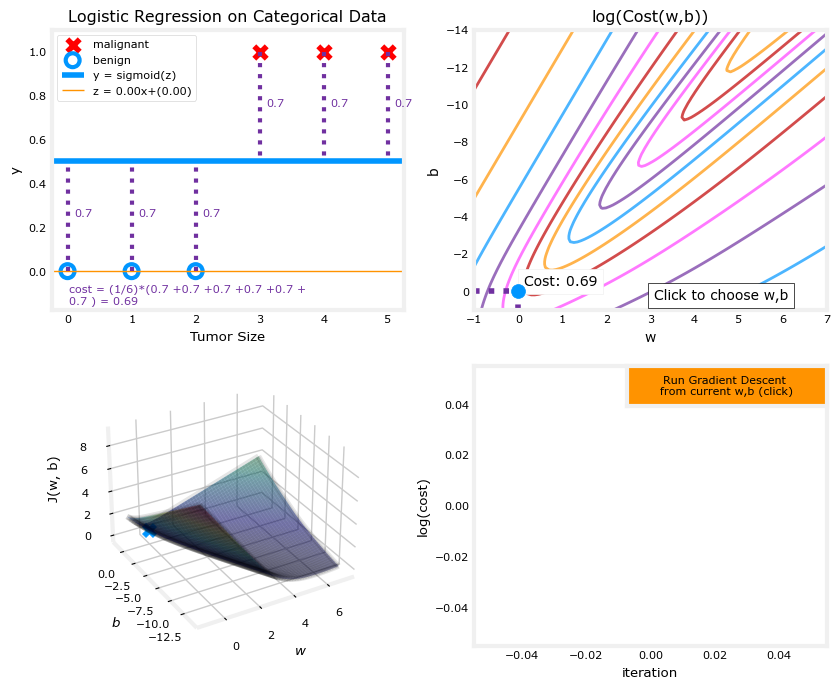

In [50]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic( x_train, y_train, w_range, b_range )

## Congratulations!
You have:
- examined the formulas and implementation of calculating the gradient for logistic regression
- utilized those routines in
    - exploring a single variable data set
    - exploring a two-variable data set